In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

file_path = 'D:/BCI_RL/important/ErrP/DMD/code/IncDMD/'
sub = ['1', '2', '3', '4', '5', '6']
ses = ['1', '2']
file_name = file_path+'Subject0'+sub[2]+'_s'+ses[0]+'.mat'

epoch_eeg = scipy.io.loadmat(file_name)['errorTrial']
print(epoch_eeg.shape)  

(64, 300, 99)


In [2]:
import math 

trial = epoch_eeg[:,:,3]  # nchannel * time points

# EEG stack
m = trial.shape[0]  # 行
n = trial.shape[1]  # 列
nstack = math.ceil(n*2 / (m+2))

aug_trial = np.array(trial[:,0:n-nstack+0+1])
for st in range(1, nstack):
    aug_trial = np.vstack((aug_trial, trial[:,st:n-nstack+st+1]))
print(nstack)
print(aug_trial.shape)

10
(640, 291)


In [3]:
from pydmd import DMD

# dmd = DMD(svd_rank=0, tlsq_rank=100, exact=True, opt=True, rescale_mode='auto')

# dmd_f = dmd.frequency / dt
# dmd_phi = dmd.modes
# dmd_dynamic = dmd.dynamics
# dmd_b = dmd.amplitudes

# print(dmd_f.size)

# recon_trial = dmd.reconstructed_data

# plt.plot(aug_trial[46], label='original signal')
# plt.plot(recon_trial[46].real, label='reconstruction signal')
# plt.legend()
# plt.xlabel('time(s)')
# plt.ylabel('Channel FCz')
# plt.show()

In [4]:
# 初始阶段
sampleRate = 300
dt = 1 / sampleRate
bidx = int(0.2*sampleRate)

fbpack = []

# seg_trial = aug_trial[:, 3:bidx+3]
# print(seg_trial.shape)

# dmd.fit(seg_trial)
# dmd_f = dmd.frequency / dt
# print(dmd_f)
# dmd_b = dmd.amplitudes
# idx = [i for i in range(len(dmd_f)) if abs(dmd_f[i])>= 1 and abs(dmd_f[i])<25]
# b = dmd_b[idx][::2]
# f = dmd_f[idx][::2]   # 只包含正频率点
# fb = list(zip(f[:7], b[:7]))
# fb.sort(key=lambda x:x[0])
# print(len(fb))
# print(fb)

# fbpack.append(fb)

In [5]:
# 动态更新数据矩阵以及DMD算子
for i in range(0, len(aug_trial[0])-bidx+1): 
    seg_trial = aug_trial[:, i:bidx+i]
    
    dmd = DMD(svd_rank=0, tlsq_rank=100, exact=True, opt=True)
    dmd.fit(seg_trial)
    dmd_f = dmd.frequency / dt
    dmd_b = dmd.amplitudes
    
    idx = [i for i in range(len(dmd_f)) if dmd_f[i]>= 1 and dmd_f[i]<25]
    b = dmd_b[idx]
    f = dmd_f[idx]   # 只包含正频率点
    fb = list(zip(f[:7], b[:7]))
    fb.sort(key=lambda x:x[0])
    fbpack.append(fb)
  

C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 96950880.89573553. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 97096539.49010037. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 97106219.71263553. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 96770907.7427263. Consider preprocessing data, passing in augmented data matrix, or regularization meth

C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 122961887.45258693. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 121523543.5485741. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 117358197.7003772. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 111532853.52687551. Consider preprocessing data, passing in augmented data matrix, or regularization m

C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 99285493.12765828. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 99625887.01389799. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 100276063.98217744. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 100312765.51995039. Consider preprocessing data, passing in augmented data matrix, or regularization m

C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 217855520.23586378. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 214423234.45696673. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 211595619.11437562. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 208862883.2788599. Consider preprocessing data, passing in augmented data matrix, or regularization 

C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 250610417.15209854. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 251385821.4578522. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 253346433.40694812. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 255456215.45196098. Consider preprocessing data, passing in augmented data matrix, or regularization 

C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 275164337.11329716. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 273572699.86912334. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 271428162.8796577. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 270198088.65357965. Consider preprocessing data, passing in augmented data matrix, or regularization 

C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 260326454.28804198. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 261210482.10173455. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 261486004.65621167. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 261214979.2202696. Consider preprocessing data, passing in augmented data matrix, or regularization 

In [6]:
fbpack = np.array(fbpack)
ft, bt = [], []
for i in range(len(fbpack)):
    ft.append((fbpack[i][:,0].real))
    bt.append((fbpack[i][:,1]))
ft = np.array(ft)
bt = np.array(bt)
print(ft.shape, bt.shape)

(232, 7) (232, 7)


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]


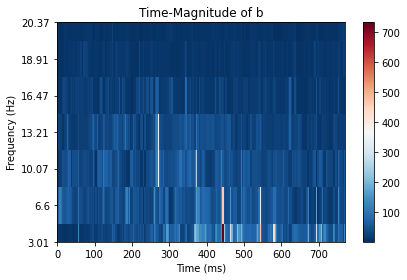

In [56]:
from mne.baseline import rescale

bt = np.absolute(bt)
times  = np.arange(0, bt.shape[0]) * dt
freqs = np.arange(0,bt.shape[1])

fig, ax = plt.subplots()
x, y = centers_to_edges(times * 1000, freqs)
mesh = ax.pcolormesh(x, y, bt.T, cmap='RdBu_r')
ax.set_title('Time-Magnitude of b')
ax.set(ylim=freqs[[0, -1]], xlabel='Time (ms)',
       yticklabels=list(map(str,np.round(np.mean(ft,axis=0),2))),
      ylabel='Frequency (Hz)')
fig.colorbar(mesh)
plt.tight_layout()

plt.show()

<AxesSubplot:>

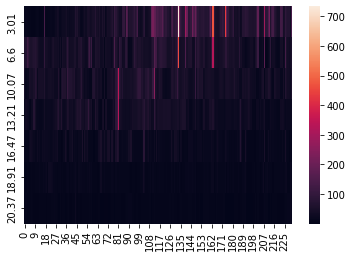

In [7]:
import seaborn as sns

# xticklabels=['-0.2-0','0-0.2','0.2-0.4','0.4-0.6','0.6-0.8']
bt = np.absolute(bt)

sns.heatmap(data=bt.T,
            yticklabels=list(map(str,np.round(np.mean(ft,axis=0),2))))
# xticklabels=list(map(str,np.round(np.arange(0,233,9)*dt,1)))

In [59]:
ffbpack = []

for i in range(0, len(aug_trial[0])-bidx+1): 
    seg_trial = aug_trial[:, i:bidx+i]
    
    dmd = DMD(svd_rank=0, tlsq_rank=100, exact=True, opt=True)
    dmd.fit(seg_trial)
    dmd_f = dmd.frequency / dt
    dmd_b = dmd.amplitudes
    
    idx = [i for i in range(len(dmd_f)) if dmd_f[i]> 0]
    b = dmd_b[idx]
    f = dmd_f[idx]   # 只包含正频率点
    ffb = list(zip(f[:11], b[:11]))
    ffb.sort(key=lambda x:x[0])
    ffbpack.append(ffb) 

In [60]:
ffbpack = np.array(ffbpack)
fft, fbt = [], []
for i in range(len(ffbpack)):
    fft.append((ffbpack[i][:,0].real))
    fbt.append((ffbpack[i][:,1]))
fft = np.array(fft)
fbt = np.array(fbt)
print(fft.shape, fbt.shape)

(232, 11) (232, 11)


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':


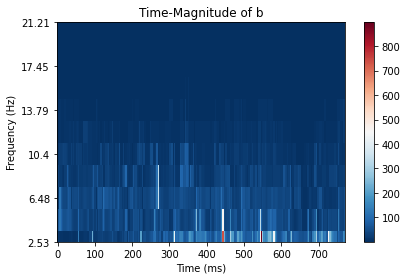

In [62]:
fbt = np.absolute(fbt)

times  = np.arange(0, fbt.shape[0]) * dt
freqs = np.arange(0,fbt.shape[1])

fig, ax = plt.subplots()
x, y = centers_to_edges(times * 1000, freqs)
mesh = ax.pcolormesh(x, y, fbt.T, cmap='RdBu_r')
ax.set_title('Time-Magnitude of b')
ax.set(ylim=freqs[[0, -1]], xlabel='Time (ms)',
       yticklabels=list(map(str,np.round(np.mean(fft,axis=0),2))),
       ylabel='Frequency (Hz)')
fig.colorbar(mesh)
plt.tight_layout()

plt.show()

<AxesSubplot:>

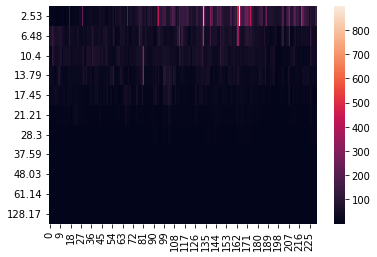

In [11]:
import seaborn as sns

times = np.arange(-60,240) * dt
# xticklabels=['-0.2-0','0-0.2','0.2-0.4','0.4-0.6','0.6-0.8']
fbt = np.absolute(fbt)

sns.heatmap(data=fbt.T,
            yticklabels=list(map(str,np.round(np.mean(fft,axis=0),2))))
# xticklabels=list(map(str,np.round(np.arange(0,233,9)*dt,1)))

In [12]:
81*dt

0.27

In [13]:
135*dt

0.45

In [14]:
180*dt

0.6000000000000001

In [63]:
fppack = []

for i in range(0, len(aug_trial[0])-bidx+1): 
    seg_trial = aug_trial[:, i:bidx+i]
    
    dmd = DMD(svd_rank=0, tlsq_rank=100, exact=True, opt=True, rescale_mode='auto') 
    dmd.fit(seg_trial)
    dmd_f = dmd.frequency / dt
    dmd_b = dmd.amplitudes
    dmd_phi = dmd.modes
    
    # DMD spectrum
    dmd_p = np.diag(np.dot(dmd_phi.T.conj(), dmd_phi))
    
    idx = [i for i in range(len(dmd_f)) if dmd_f[i] > 0]
    f = dmd_f[idx]          # 只包含正频率点
    p = dmd_p[idx]
    fp = list(zip(f[:11], p[:11]))
    fp.sort(key=lambda x:x[0])
    
    fppack.append(fp)
    

In [64]:
# print(len(fppack), len(fppack[99]))
fppack = np.array(fppack)
print(fppack.shape)
mft, mpt = [], []
for i in range(len(fppack)):
    mft.append((fppack[i][:,0].real))
    mpt.append((fppack[i][:,1].real))
mft = np.array(mft)
mpt = np.array(mpt)
print(mft.shape, mpt.shape)

(232, 11, 2)
(232, 11) (232, 11)


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.


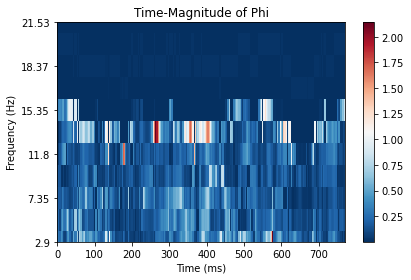

In [74]:
times  = np.arange(0, mpt.shape[0]) * dt
freqs = np.arange(0,mpt.shape[1])

fig, ax = plt.subplots()
x, y = centers_to_edges(times * 1000, freqs)
mesh = ax.pcolormesh(x, y, mpt.T, cmap='RdBu_r')
ax.set_title('Time-Magnitude of Phi')
ax.set(ylim=freqs[[0, -1]], xlabel='Time (ms)',
       yticklabels=list(map(str,np.round(np.mean(mft,axis=0),2))),
       ylabel='Frequency (Hz)')
fig.colorbar(mesh)
plt.tight_layout()

plt.show()

<AxesSubplot:>

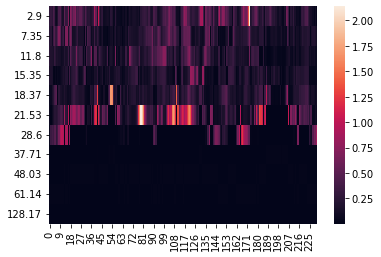

In [14]:
import seaborn as sns

# xticklabels=['-0.2-0','0-0.2','0.2-0.4','0.4-0.6','0.6-0.8']

sns.heatmap(data=mpt.T,
            yticklabels=list(map(str,np.round(np.mean(mft,axis=0),2))))
# xticklabels=list(map(str,np.round(np.arange(0,233,9)*dt,1)))

C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 939438146.5295485. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


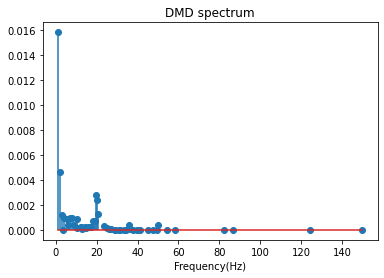

In [15]:
# 整个trial的DMD spectrum
dmd = DMD(svd_rank=0, tlsq_rank=100, exact=True, opt=True, rescale_mode='auto') 
dmd.fit(aug_trial)
dmd_f = dmd.frequency / dt
dmd_b = dmd.amplitudes
dmd_phi = dmd.modes
    
# DMD spectrum
dmd_p = np.diag(np.dot(dmd_phi.T.conj(), dmd_phi))
    
idx = [i for i in range(len(dmd_f)) if dmd_f[i] > 0]
f = dmd_f[idx]          # 只包含正频率点
p = dmd_p[idx]

plt.stem(f, abs(p))  # /sum(abs(p))
plt.xlabel('Frequency(Hz)')
plt.title('DMD spectrum')
plt.show()

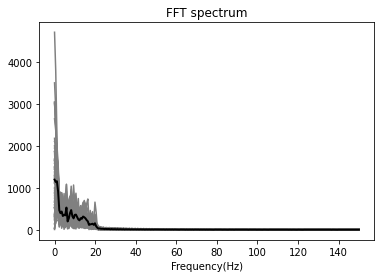

In [16]:
# FFT spectrum
from scipy.fftpack import fft

timesteps = trial.shape[1]
srate = 1/dt
nelectrodes = 64
# 求出信号长度的下一个最近二次幂
# 类似于MATLAB 中的Nextpower2(), 为了更加精确快速的进行傅里叶变换
NFFT = np.power(2, np.ceil(np.log2(timesteps)))
f_fft = srate/2*np.linspace(0, 1, int(NFFT/2+1))

fftp = []
for i in range(nelectrodes): 
    fftp.append(fft(trial[i, :], int(NFFT)))
    plt.plot(f_fft, 2*abs(fftp[i][0:int(NFFT/2+1)]), color='gray')
fftp = np.array(fftp)
plt.plot(f_fft, np.mean(2*abs(fftp[:, 0:int(NFFT/2+1)]), 0), color='black', linewidth=2)
plt.xlabel('Frequency(Hz)')
plt.title('FFT spectrum')
plt.show()

In [17]:
from mne.baseline import rescale
from mne.time_frequency import (tfr_multitaper, tfr_stockwell, tfr_morlet,
                                tfr_array_morlet)
from mne.viz import centers_to_edges

In [67]:
epoch_trial = np.array([trial])
print(epoch_trial.shape)   #  (n_epochs, n_channels, n_times)
freqs = np.arange(0.1, 150., 5.)
n_cycles = freqs / 2.
vmin, vmax = -3., 3.  # color limits.

power = tfr_array_morlet(epoch_trial, sfreq=sampleRate,
                         freqs=freqs, n_cycles=n_cycles,
                        output='power')
# (n_epochs, n_channels, n_freqs, n_times)
print(power.shape)

(1, 64, 300)
(1, 64, 30, 300)


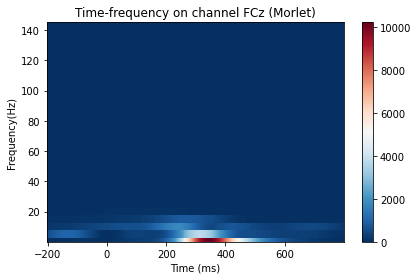

In [68]:
times = np.arange(-60,240) * dt

fig, ax = plt.subplots()
x, y = centers_to_edges(times * 1000, freqs)
mesh = ax.pcolormesh(x, y, power[0][46], cmap='RdBu_r')
ax.set_title('Time-frequency on channel FCz (Morlet)')
ax.set(ylim=freqs[[0, -1]], xlabel='Time (ms)', ylabel='Frequency(Hz)')
fig.colorbar(mesh)
plt.tight_layout()

plt.show()

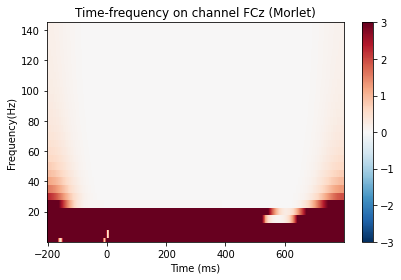

In [71]:
times = np.arange(-60,240) * dt

fig, ax = plt.subplots()
x, y = centers_to_edges(times * 1000, freqs)
mesh = ax.pcolormesh(x, y, power[0][46], cmap='RdBu_r', vmin=-3.,vmax=3.)
ax.set_title('Time-frequency on channel FCz (Morlet)')
ax.set(ylim=freqs[[0, -1]], xlabel='Time (ms)', ylabel='Frequency(Hz)')
fig.colorbar(mesh)
plt.tight_layout()

plt.show()